In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgboost
from sklearn.metrics import confusion_matrix, RocCurveDisplay, roc_auc_score, classification_report,f1_score,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

data = pd.read_csv('../data/clean_data_test.csv',index_col=0)

target = 'converted'
cat_features = ['country', 'source']
num_features = ["age","new_user","total_pages_visited"]

Y = data[target]
X = data.drop(columns=target)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
cat_transformer = Pipeline(steps=[
    ("encoder",OneHotEncoder(drop='first'))
])
num_transformer = Pipeline(steps=[
    ("scaler",StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ("cat",cat_transformer,cat_features),
    ("num",num_transformer,num_features)
])
print("Preprocess de X_train et X_test ...")
print("")
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
print("Preprocess de X_train et X_test finis")
print("")
print("Preprocess de Y_train et Y_test ...")

## peut ne pas etre nécessaire car déja encoder 0 et 1
label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(Y_train)
Y_test = label_encoder.transform(Y_test)



Preprocess de X_train et X_test ...

Preprocess de X_train et X_test finis

Preprocess de Y_train et Y_test ...


In [ ]:
model = xgboost.XGBClassifier(
    n_estimators=2,    
    objective="binary:logistic",  # classification binaire
    eval_metric="logloss",        # métrique interne
    use_label_encoder=False,      # éviter un warning
    random_state=42,
    n_jobs=-1  
)
# fit model
model.fit(X_train, Y_train)

y_pred_train = model.predict(X_train)
y_pred_train_proba = model.predict_proba(X_train)[:, 1]
y_pred_test = model.predict(X_test)
y_proba_test = model.predict_proba(X_test)[:, 1]

print("Classification Report Train :")
print(classification_report(Y_train, y_pred_train))


print("Classification Report Test :")
print(classification_report(Y_test, y_pred_test))

Classification Report Train :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    219516
           1       0.80      0.64      0.71      7334

    accuracy                           0.98    226850
   macro avg       0.89      0.82      0.85    226850
weighted avg       0.98      0.98      0.98    226850

Classification Report Test :
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     54874
           1       0.82      0.62      0.70      1839

    accuracy                           0.98     56713
   macro avg       0.90      0.81      0.85     56713
weighted avg       0.98      0.98      0.98     56713



c:\Users\bonna\Desktop\CREA_APPLICATIONS\dsfs-od-11\machine_learning\venv_here\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:51:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


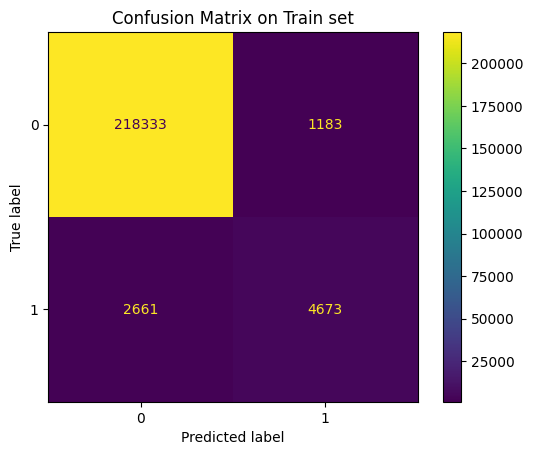

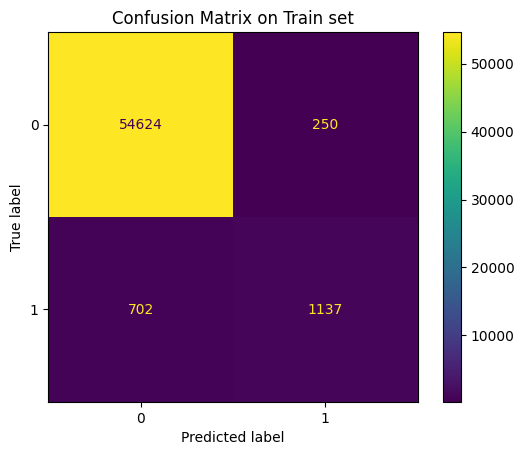

In [6]:
_, ax = plt.subplots()  # Get subplot from matplotlib
ax.set(
    title="Confusion Matrix on Train set"
)  # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    model, X_train, Y_train, ax=ax
)  # ConfusionMatrixDisplay from sklearn
plt.show()

_, ax = plt.subplots()  # Get subplot from matplotlib
ax.set(
    title="Confusion Matrix on Train set"
)  # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    model, X_test, Y_test, ax=ax
)  # ConfusionMatrixDisplay from sklearn
plt.show()

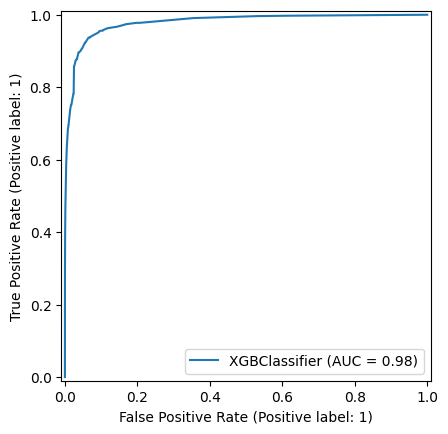

In [7]:

import matplotlib.pyplot as plt

RocCurveDisplay.from_estimator(model, X_test, Y_test)
plt.show()


In [8]:
feature_names = preprocessor.get_feature_names_out().tolist()
importances = model.feature_importances_.tolist()
print(feature_names)
print(importances)

['cat__country_Germany', 'cat__country_UK', 'cat__country_US', 'cat__source_Direct', 'cat__source_Seo', 'num__age', 'num__new_user', 'num__total_pages_visited']
[0.03635159879922867, 0.005766277201473713, 0.009816101752221584, 0.0030577147845178843, 0.0, 0.02263050153851509, 0.13752542436122894, 0.7848523855209351]


In [9]:
for index, i in enumerate(importances):
    print(f"{feature_names[index]} : {i}")

cat__country_Germany : 0.03635159879922867
cat__country_UK : 0.005766277201473713
cat__country_US : 0.009816101752221584
cat__source_Direct : 0.0030577147845178843
cat__source_Seo : 0.0
num__age : 0.02263050153851509
num__new_user : 0.13752542436122894
num__total_pages_visited : 0.7848523855209351


In [14]:
f1_score_train = f1_score(Y_train,y_pred_train)
f1_score_test = f1_score(Y_test,y_pred_test)
print(round(f1_score_train,2))
print(round(f1_score_test,2))

0.71
0.7


Chargement des données de test

In [15]:
data_test = pd.read_csv('../data/conversion_data_test.csv')

In [ ]:
data_test.head()